# ROC AUC
Receiver Operating Characteristic Area Under Curve
- model => probability => prediction 0/1 | threshold def = 0.5
- lopp threshold 0 - 1 = new prediction
- setiap prediction => confusion matrix
- confusion matrix => TP, TN, FP, FN => TP Rate (Recall+) & FP Rate
- Buat plot FPR & TPR => ROC Curve => luas AUC 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pylt
from sklearn.linear_model import LogisticRegression

In [8]:
data = {
    'x': np.arange(1,11),
    'y': np.hstack((np.zeros(5), np.ones(5)))
}
df = pd.DataFrame(data)
df

,x,y
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,1.0
6,7,1.0
7,8,1.0
8,9,1.0
9,10,1.0


In [9]:
modelR = LogisticRegression(solver='lbfgs')
modelR.fit(df[['x']], df['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
df['proba'] = modelR.predict_proba(df[['x']])[:,1]
df

,x,y,proba
0,1,0.0,0.004787
1,2,0.0,0.015504
2,3,0.0,0.049032
3,4,0.0,0.144426
4,5,0.0,0.355947
5,6,1.0,0.644053
6,7,1.0,0.855574
7,8,1.0,0.950968
8,9,1.0,0.984496
9,10,1.0,0.995213


In [16]:
#variasi threshold
# df['y 0.3'] = df['proba'].apply(lambda x: 1 if (x>0.3) else 0)
# df = df.drop('y 0.3', axis=1)

In [17]:
for i in np.arange(0.1, 1, 0.1):
    df[f'y"{round(i,2)}'] = df['proba'].apply(lambda x: 1 if (x>round(i, 2)) else 0)
df

,x,y,proba,"y""0.1","y""0.2","y""0.3","y""0.4","y""0.5","y""0.6","y""0.7","y""0.8","y""0.9"
0,1,0.0,0.004787,0,0,0,0,0,0,0,0,0
1,2,0.0,0.015504,0,0,0,0,0,0,0,0,0
2,3,0.0,0.049032,0,0,0,0,0,0,0,0,0
3,4,0.0,0.144426,1,0,0,0,0,0,0,0,0
4,5,0.0,0.355947,1,1,1,0,0,0,0,0,0
5,6,1.0,0.644053,1,1,1,1,1,1,0,0,0
6,7,1.0,0.855574,1,1,1,1,1,1,1,1,0
7,8,1.0,0.950968,1,1,1,1,1,1,1,1,1
8,9,1.0,0.984496,1,1,1,1,1,1,1,1,1
9,10,1.0,0.995213,1,1,1,1,1,1,1,1,1


In [18]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(df['y'], df['y"0.1']).ravel()
print(tn, fp, fn, tp)
print('fpr =', fp/ (fp+tn))
print('tpr =', tp/(tp+fn))

3 2 0 5
fpr = 0.4
tpr = 1.0


In [20]:
roc = []
for i in np.arange(0.1, 1, 0.1):
    tn, fp, fn, tp = confusion_matrix(df['y'], df[f'y"{round(i,2)}']).ravel()
    fpr = fp/(fp+tn)
    tpr = tp/(tp+fn)
    roc.append([fpr,tpr])
roc

[[0.4, 1.0],
 [0.2, 1.0],
 [0.2, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 0.8],
 [0.0, 0.8],
 [0.0, 0.6]]

In [21]:
roc = np.array(roc)
roc

array([[0.4, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 0.8],
       [0. , 0.8],
       [0. , 0.6]])

Text(0, 0.5, 'True Postitive Rate')

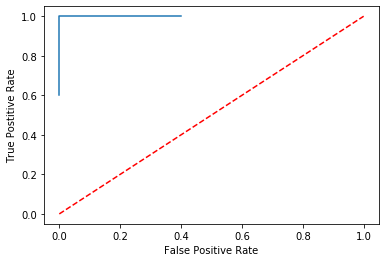

In [26]:
import matplotlib.pyplot as plt
plt.plot(roc[:,0], roc[:,1])
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postitive Rate')

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

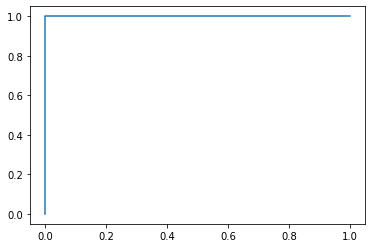

In [34]:
fpr, tpr, th = roc_curve(df['y'], modelR.predict_proba(df[['x']])[:,1])
plt.plot(fpr,tpr)

In [35]:
roc_auc_score(df['y'], modelR.predict(df[['x']]))

1.0